<a href="https://colab.research.google.com/github/zainali78690/IBM-Course/blob/main/IBM_Unsupervised_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import loguniform
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from tqdm import tqdm
from itertools import accumulate

In [26]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [27]:
wine = pd.read_csv('wine-clustering.csv')

In [28]:
#Preprocessing
wine = wine.dropna().astype(np.float64)
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.60,127.00,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.00
1,13.20,1.78,2.14,11.20,100.00,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.00
2,13.16,2.36,2.67,18.60,101.00,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.00
3,14.37,1.95,2.50,16.80,113.00,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.00
4,13.24,2.59,2.87,21.00,118.00,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.00


In [29]:
wine.info()
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    float64
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.21,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [30]:
#EDA
wine.skew()

Alcohol                -0.05
Malic_Acid              1.04
Ash                    -0.18
Ash_Alcanity            0.21
Magnesium               1.10
Total_Phenols           0.09
Flavanoids              0.03
Nonflavanoid_Phenols    0.45
Proanthocyanins         0.52
Color_Intensity         0.87
Hue                     0.02
OD280                  -0.31
Proline                 0.77
dtype: float64

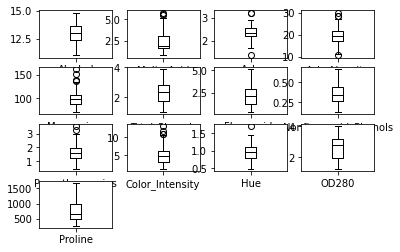

In [31]:

wine.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

In [32]:
#Transformation
scaler = StandardScaler()
wine[:] = scaler.fit_transform(wine)
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.52,-0.56,0.23,-1.17,1.91,0.81,1.03,-0.66,1.22,0.25,0.36,1.85,1.01
1,0.25,-0.50,-0.83,-2.49,0.02,0.57,0.73,-0.82,-0.54,-0.29,0.41,1.11,0.97
2,0.20,0.02,1.11,-0.27,0.09,0.81,1.22,-0.50,2.14,0.27,0.32,0.79,1.40
3,1.69,-0.35,0.49,-0.81,0.93,2.49,1.47,-0.98,1.03,1.19,-0.43,1.18,2.33
4,0.30,0.23,1.84,0.45,1.28,0.81,0.66,0.23,0.40,-0.32,0.36,0.45,-0.04


In [33]:
#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(wine)
Y_pca = pca.fit(wine)

# Convert to data frame
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

# Shape and preview
print(principal_df.shape)
principal_df.head()

(178, 2)


,PC1,PC2
0,3.32,-1.44
1,2.21,0.33
2,2.52,-1.03
3,3.76,-2.76
4,1.01,-0.87


In [34]:
Y_pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

Text(0, 0.5, 'PC2')

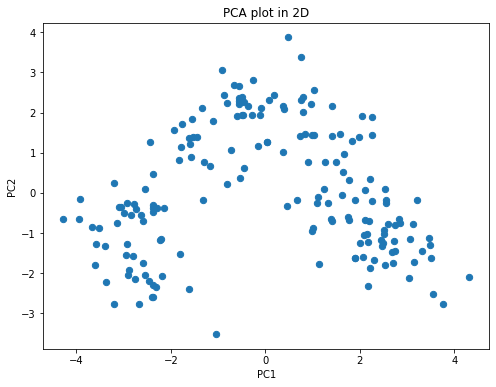

In [35]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [36]:
pca = PCA(n_components=10)
reduced_data = pca.fit(wine).transform(wine)

pd.DataFrame(reduced_data, columns=[f'Component {i}' for i in range(reduced_data.shape[1])]).head()

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9
0,3.32,-1.44,-0.17,-0.22,0.69,-0.22,0.60,0.07,0.64,1.02
1,2.21,0.33,-2.03,-0.29,-0.26,-0.93,0.05,1.02,-0.31,0.16
2,2.52,-1.03,0.98,0.72,-0.25,0.55,0.42,-0.34,-1.18,0.11
3,3.76,-2.76,-0.18,0.57,-0.31,0.11,-0.38,0.64,0.05,0.24
4,1.01,-0.87,2.03,-0.41,0.30,-0.41,0.44,0.42,0.33,-0.08


In [37]:
#Kernel PCA
# Custom scorer--use negative rmse of inverse transform
def scorer(pcamodel, X, y=None):

    try:
        X_val = X.values
    except:
        X_val = X
        
    # Calculate and inverse transform the data
    data_inv = pcamodel.fit(X_val).transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)
    
    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())
    
    # Larger values are better for scorers, so take negative value
    return -1.0 * mse

# The grid search parameters
param_grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
              'n_components': [2, 3, 4]}

# The grid search
kernelPCA = GridSearchCV(KernelPCA(kernel='rbf', fit_inverse_transform=True),
                         param_grid=param_grid,
                         scoring=scorer,
                         n_jobs=-1)


kernelPCA = kernelPCA.fit(wine)

kernelPCA.best_estimator_

KernelPCA(fit_inverse_transform=True, gamma=0.1, kernel='rbf', n_components=4)

In [53]:
kernel_pca = KernelPCA(kernel="rbf" ,fit_inverse_transform=True, gamma=0.1, n_components = 4)
kernel_score=kernel_pca.fit_transform(wine)
Y_kernel = kernel_pca.fit(wine)

# Convert to data frame
principal_df_1 = pd.DataFrame(data = kernel_score, columns = ['PC1', 'PC2','PC3','PC4'])

# Shape and preview
print(principal_df_1.shape)
principal_df_1.head()

(178, 4)


,PC1,PC2,PC3,PC4
0,0.47,-0.24,-0.02,0.01
1,0.34,0.00,0.29,-0.18
2,0.44,-0.16,-0.13,0.13
3,0.38,-0.27,-0.07,-0.02
4,0.23,-0.05,-0.37,0.30


In [54]:
explained_variance = np.var(kernel_score, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
explained_variance_ratio

array([0.44328064, 0.31176146, 0.12897516, 0.11598274])

In [51]:
# t-SNE
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(wine)

# Convert to data frame
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2','3'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

(178, 3)


,tsne comp. 1,tsne comp. 2,3
0,47.74,6.27,34.30
1,29.50,28.03,-5.73
2,27.62,6.90,33.12
3,43.48,29.25,46.81
4,1.15,11.52,31.21


In [52]:
explained_variance_1 = np.var(X_tsne, axis=0)
explained_variance_ratio_1 = explained_variance_1 / np.sum(explained_variance_1)
explained_variance_ratio_1

array([0.5281722 , 0.24435236, 0.22747545], dtype=float32)

In [42]:
# Testing PCA methods on K-means
import sklearn.cluster as cluster
from tqdm import tqdm

inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(wine)

100%|██████████| 8/8 [00:00<00:00, 37.07it/s]


In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

# Train and make predictions
clusters = kmeans.fit_predict(wine)

# Cluster centers
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

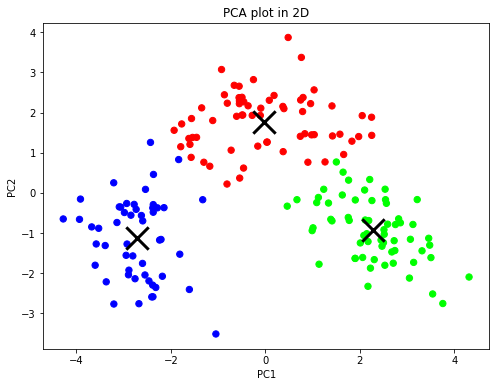

In [44]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

# Train and make predictions
clusters = kmeans.fit_predict(wine)

# Cluster centers
centroids = kmeans.cluster_centers_
centroids_kernal_pca = kernel_pca.transform(wine)

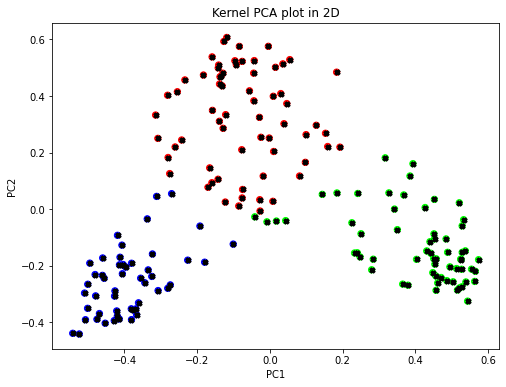

In [46]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df_1.iloc[:,0], principal_df_1.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_kernal_pca[:,0], y=centroids_kernal_pca[:,1], marker="x", s=20, linewidths=3, color="black")

# Aesthetics
plt.title('Kernel PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

# Train and make predictions
clusters = kmeans.fit_predict(wine)

# Cluster centers
centroids = kmeans.cluster_centers_
centroids_tsne = tsne.fit_transform(wine)

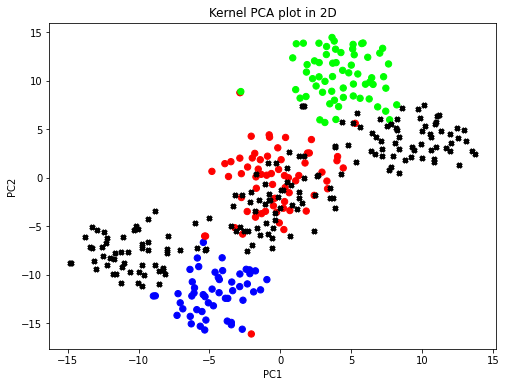

In [48]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_tsne[:,0], y=centroids_tsne[:,1], marker="x", s=20, linewidths=3, color="black")

# Aesthetics
plt.title('Kernel PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()